# Workshop AI - Introduction to Pytorch

You are welcomed into my Introduction to Pytorch Workshop, I hope you will like it !


## What is Pytorch ?


Pytorch is a open source Machine Learning (ML) framework, built in Python and C++ but mostly used in Python.

Using Pytorch enhance your Machine Learning journey !

Most of the current machine learning models, like LLM or Computer Vision models !

Learning Pytorch make you able to understand deeply of how an AI model works and it will surely be useful for the future !

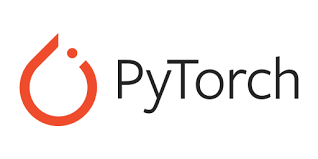

## Building a Pokemon Classifier Model

During this workshop we are going to build a Pokemon classifier model, for example: You have a Pikachu Image you feed it to the model and it predicts you that it is Pikachu !

Incredible right ? ✨

To help you in this workshop, we will use a few framework, like [Hugging Face](https://huggingface.co/docs/datasets/index) and (surprisingly) [Pytorch](https://pytorch.org/docs/stable/index.html) !

Take a look at these two documentation and be ready to look at it during this workshop !

## Installation

Before we start anything, let's install all the dependencies for this workshop:

In [ ]:
# Execute this cell !

## Installing pytorch
%pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 --index-url https://download.pytorch.org/whl/cu124

## Installing datasets package
%pip install datasets

## Installing Pillow to decode images
%pip install Pillow

## Installing tqdm to have a better output when doing a loop
%pip install tqdm

## Import & Constants needed

The cell below correspond to all the constants we are going to use in this project !

Some of them are going to be useful later, so you can take a look now, but don't take too much time, because you are going to come back later !

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

print(f"Torch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

BATCH_SIZE = 32
IMAGE_SIZE = 224 * 224 # Size of a Pokemon Image
LR = 1e-3 # Learning Rate
EPOCHS=100

# All the pokemons/labels name at each index
LABELS=['Porygon', 'Goldeen', 'Hitmonlee', 'Hitmonchan', 'Gloom', 'Aerodactyl', 'Mankey', 'Seadra', 'Gengar', 'Venonat', 'Articuno', 'Seaking', 'Dugtrio', 'Machop', 'Jynx', 'Oddish', 'Dodrio', 'Dragonair', 'Weedle', 'Golduck', 'Flareon', 'Krabby', 'Parasect', 'Ninetales', 'Nidoqueen', 'Kabutops', 'Drowzee', 'Caterpie', 'Jigglypuff', 'Machamp', 'Clefairy', 'Kangaskhan', 'Dragonite', 'Weepinbell', 'Fearow', 'Bellsprout', 'Grimer', 'Nidorina', 'Staryu', 'Horsea', 'Electabuzz', 'Dratini', 'Machoke', 'Magnemite', 'Squirtle', 'Gyarados', 'Pidgeot', 'Bulbasaur', 'Nidoking', 'Golem', 'Dewgong', 'Moltres', 'Zapdos', 'Poliwrath', 'Vulpix', 'Beedrill', 'Charmander', 'Abra', 'Zubat', 'Golbat', 'Wigglytuff', 'Charizard', 'Slowpoke', 'Poliwag', 'Tentacruel', 'Rhyhorn', 'Onix', 'Butterfree', 'Exeggcute', 'Sandslash', 'Pinsir', 'Rattata', 'Growlithe', 'Haunter', 'Pidgey', 'Ditto', 'Farfetchd', 'Pikachu', 'Raticate', 'Wartortle', 'Vaporeon', 'Cloyster', 'Hypno', 'Arbok', 'Metapod', 'Tangela', 'Kingler', 'Exeggutor', 'Kadabra', 'Seel', 'Voltorb', 'Chansey', 'Venomoth', 'Ponyta', 'Vileplume', 'Koffing', 'Blastoise', 'Tentacool', 'Lickitung', 'Paras', 'Clefable', 'Cubone', 'Marowak', 'Nidorino', 'Jolteon', 'Muk', 'Magikarp', 'Slowbro', 'Tauros', 'Kabuto', 'Spearow', 'Sandshrew', 'Eevee', 'Kakuna', 'Omastar', 'Ekans', 'Geodude', 'Magmar', 'Snorlax', 'Meowth', 'Pidgeotto', 'Venusaur', 'Persian', 'Rhydon', 'Starmie', 'Charmeleon', 'Lapras', 'Alakazam', 'Graveler', 'Psyduck', 'Rapidash', 'Doduo', 'Magneton', 'Arcanine', 'Electrode', 'Omanyte', 'Poliwhirl', 'Mew', 'Alolan Sandslash', 'Mewtwo', 'Weezing', 'Gastly', 'Victreebel', 'Ivysaur', 'MrMime', 'Shellder', 'Scyther', 'Diglett', 'Primeape', 'Raichu']
NB_LABELS=len(LABELS) # Number of pokemons/labels
print(f"NB_LABELS: {NB_LABELS}")

# Enable GPU if you have one
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(f"Device: {device}")

## Introduction to Tensor

Before going any further let's take a look at a data structure that you will be using all along this workshop the `Tensor`.

A Tensor is just a N-Dimensionnal array that have mathematical properties (like Matrix) and can be used efficiently by GPUs !

You will have a few code cells below, it will be few little exercices to make you easily manipulate Tensors !

- Create a 2x2 Tensor with default values of `torch.ones`, and another 2x2 Tensor that will be created with `torch.arange` and add them together !

In [ ]:
## ~3 Lines

<details>
  <summary>Hint</summary>
Create the tensor and try to use `torch.reshape` on them.
</details>

- Create a 3x5 Matrix full of one and a 5x6 Matrix full of one too and do a matrix multiplication on them

In [ ]:
## ~3-4 Lines

- Create randomly a 1-D Tensor and try to find the index of the maximum value

In [ ]:
## ~2 Lines

The last exercice is really useful because in our model, we will have output and we want to have the index of the maximum because it will correspond to the prediction of the model !

## Data Preprocessing

An important thing to do in Machine Learning, before trying to build any model, is to load and preprocess the datas we are going to use !

To do this we will use simple Python and the [Hugging Face](https://huggingface.co/docs/datasets/index) framework !

### Load datasets

Using the `load_dataset` function try to load this dataset: [keremberke/pokemon-classification](https://huggingface.co/datasets/keremberke/pokemon-classification?sql=--+The+SQL+console+is+powered+by+DuckDB+WASM+and+runs+entirely+in+the+browser.%0A--+Get+started+by+typing+a+query+or+selecting+a+view+from+the+options+below.%0ASELECT+*+FROM+full_train+LIMIT+10%3B) !

In [ ]:
## ~2-3 Lines

Before going any further create a Jupyter Notebook cell and try to manipulate this new dataset you have just loaded !

The objective is to understand how Hugging Face data architecture works, feel free to look at the documentation !

In [1]:
## Try to manipulate the dataset !

### Set format and transformation

The dataset we have, we have to transform it to a form that our model can accept (aka Tensor).

Using `torchvision` find a way to **transform** the image to a data structure named a `Tensor`.

* Resize
* Convert to RGB Value (Optionnal)
* ToTensor
* Normalize (Figure it out why)

In [ ]:
transform = transforms.Compose([
    ...
])

transform

Now try to set the format of the dataset to `torch` and set the transformation to the one you created before !

In [ ]:
## ~2-3 Lines

### Datasets and Dataloader

Okay, now you've completely transformed you dataset, into a Tensor one, but it is not finished...

We will use Pytorch `Dataloader` which is a package that permits us to manipulate easily a dataset in Pytorch training loop.

Complete this `HFDataset` class that inherits from `Dataset` torch class and thus make it able to be manipulated by `Dataloader`.

In [8]:
from torch.utils.data import Dataset

class HFDataset(Dataset):
    def __init__(self, dset):
        self.dset = dset

    def __getitem__(self, idx):
        ...

    def __len__(self):
        ...

Load the dataset in a `DataLoader`, this will permit you to apply specific transformation to the dataset, as:

* Adding a batch size
* Shuffle the dataset

__NOTE__: If you want this to be fast look at `num_worker` parameter in `DataLoader` function.

To iterate over a dataset for testing purposes you can use `next(iter(<your-dataset>))`, that will transform you dataset in iterator form and then iterate one time in it.

Load a train, test and validation dataset !

In [ ]:
train_set = ...

test_set = ...

## Optionnal Validation dataset
validation_set = ...

...

### Visualize the data

It should be much more fun if you would be able to see the pokemons no ?

Complete the `tensorToPIL` function and try to display the image of the pokemon !

In [ ]:
## Observe the value inside this dictionnary
def tensorToPIL(tensor: torch.Tensor):
    return torchvision.transforms.functional.to_pil_image(tensor)

tensorToPIL(next(iter(train_set))["image"][0])

**INCREDIBLE**

## Pokemon Model

Now start the real game.

Your objective now is to create a `PokemonModel` and feed it the data you have processed !

`PokemonModel` will contain the architecture of the model, feel free to look at how to do Pytorch Model !

Be careful of few things:
* The shape of the input
* The **activation function**
* The number of layers or neurons per layers (You will maybe have to test several architecture)

__NOTE__: *I know Convolution exists but I want to show that we can still do without it, especially for those who are new to Pytorch !*

**IMPORTANT**: If the results of training is not as impressive as expected it is normal, you have to try multiple architecture !

In [38]:
from torch import nn

class PokemonModel(nn.Module):
    """
        Pokemon model class:
        The objective of this class is to have a model that can predict the pokemon based on the input image
    """

    def __init__(self, in_channels: int, out_labels: int): ## Hey, what's a channel ?!
        super(PokemonModel, self).__init__()
        ...


    def forward(self, x: torch.Tensor):
        ...

Now that our Model is ready, we can initialize it and initialize 2 other things:
* The Loss Function
* The Optimizer

You're free to choose the optimizer you want but for the loss function try to use `CrossEntropyLoss`, which is better for classification.

In [ ]:
## ~3 lines
## Load model, loss_function and optimizer

## Training

Okay, let's train our poke... Euum, our model !

You have below 2 functions:
* `train`: The main training function that is used to train a model using a dataset
* `train_epoch`: An Epoch is an iteration of a loop, each iteration `train` function must call this function and iterate over all the dataset

Feel free to look at examples of training loop in the documentation !

In [40]:
from tqdm import tqdm # Hey, what's this ?!

def train_epoch(model: nn.Module, loss_function: nn.CrossEntropyLoss, train_loader: DataLoader) -> float:
    ...

In [ ]:
def train(model: nn.Module, loss_function: nn.CrossEntropyLoss, train_loader: DataLoader) -> None:
    ...


## Appreciate your results !

Yeeaaahhh, Pokemon !

Execute this cell below and look if your model is right, if it's not, go and train it again, and as a pokemon trainer this time 😎 !

In [ ]:
model.eval()

data: torch.Tensor = next(iter(train_set))["image"]
out = model(data.to(torch.float32).to(device))

print(LABELS[out[0].argmax()])
tensorToPIL(data[0])

## Bonus: CNN Model

Yes, I know that before I said that I will not talk about Convolutional Neural Network (CNN), but still if you have made it till here, it's because you're interested right ? 🥲

Create a Convolutional Neural Network (CNN), that takes an image and predict which labels the image is !

__NOTE__: This part is really complicated, feel free to ask me if you need help !

In [24]:
from torch import nn
import torch.nn.functional as F

class PokemonCNNModel(nn.Module):
    """
        PokemonCNN model class:
        The objective of this class is to have a model that can predict the pokemon based on the input image
    """

    def __init__(self, in_channels: int, out_labels: int):
        super(PokemonCNNModel, self).__init__()
        ...

    def forward(self, x):
        ...

In [ ]:
## ~3 lines
## Load CNN model, loss_function and optimizer

In [ ]:
## ~1 line
## Train the model

In [ ]:
## Appreciate the result !

modelCNN.eval()

data: torch.Tensor = next(iter(train_set))["image"]
out = modelCNN(data.to(torch.float32).to(device))

print(LABELS[out[0].argmax()])
tensorToPIL(data[0])